In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cross support for windows and linux
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# data_path = os.path.join(project_root, 'data', 'raw', 'fake_and_real_news.csv')
data_path = os.path.join(project_root, 'data', 'processed', 'processed_data.csv')

In [2]:
data = pd.read_csv(data_path)

In [3]:
data

,Text,label,label_binary,length,neg_score,neu_score,pos_score,compound_score,cleaned_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,1545,0.119,0.817,0.064,-0.9315,trump surrogate brutally stab pathetic video...
1,U.S. conservative leader optimistic of common ...,Real,0,758,0.060,0.800,0.140,0.8537,u.s conservative leader optimistic common grou...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,6157,0.093,0.791,0.116,0.9821,trump propose u.s tax overhaul stir concern de...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,2269,0.101,0.884,0.014,-0.9833,court force ohio allow million illegally pur...
4,Democrats say Trump agrees to work on immigrat...,Real,0,3748,0.059,0.853,0.088,0.9131,democrats trump agree work immigration bill wa...
...,...,...,...,...,...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,1,3243,0.088,0.860,0.052,-0.9714,wikileak admit screw immensely twitter poll ...
9896,Trump consults Republican senators on Fed chie...,Real,0,1950,0.014,0.875,0.112,0.9885,trump consult republican senator fed chief can...
9897,Trump lawyers say judge lacks jurisdiction for...,Real,0,4343,0.101,0.842,0.057,-0.9735,trump lawyer judge lack jurisdiction defamatio...
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,1,2580,0.088,0.763,0.149,0.9777,watch right wing pastor falsely credit trump...


In [4]:
# Use smaller subset of dataset for visualiztion. Equal amount of real and fake articles
real_articles = data[data['label'] == "Real"].sample(n=1000, random_state=2024)
fake_articles = data[data['label'] == "Fake"].sample(n=1000, random_state=2024)

sample_df = pd.concat([real_articles, fake_articles])
sample_df = sample_df[["label_binary", "Text"]]
sample_df

,label_binary,Text
6104,0,U.S. judge keeps bail conditions for ex-Trump ...
3581,0,"Threatened U.S. pullout might help, not hobble..."
2432,0,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...
2827,0,Trump-Russia revelations raise hopes for U.S. ...
9401,0,White House communications director Scaramucci...
...,...,...
8666,1,Ivanka Trump Attends Women’s Panel In Germany...
255,1,WATCH: Jake Tapper Mocks Republicans HARD On ...
8144,1,What Trump Just Said About His Tax Returns Wi...
3614,1,Another Russian Turns Up Dead – He Actually S...


In [5]:
from src.data_processing import WordEmbedder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Calculate the mean vector for each article in the dataframe
we = WordEmbedder()

cleaned_corpus = sample_df["Text"]

mean_vectors = we.transform(cleaned_corpus)
mean_vectors.shape

(2000, 300)

In [8]:
# Scale Mean vector for clear separation
scalar = StandardScaler()
scaled_mean_vectors = scalar.fit_transform(mean_vectors)

In [9]:
# PCA to reduce 300 feature mean vector to 2 features in order to graph in 2d space
pca2 = PCA(n_components=2)
pca2_scaled = pca2.fit_transform(scaled_mean_vectors)

df_pca2 = pd.DataFrame(data = pca2_scaled, columns=[f'PC{i}' for i in range(1, 2 + 1)])
df_pca2

,PC1,PC2
0,-3.302899,2.794251
1,-3.839860,3.460031
2,4.103437,3.556785
3,-6.996922,-1.874739
4,1.009634,0.618651
...,...,...
1995,11.085287,-0.952200
1996,-2.013119,-9.261827
1997,5.851370,-1.791639
1998,5.723330,4.058721


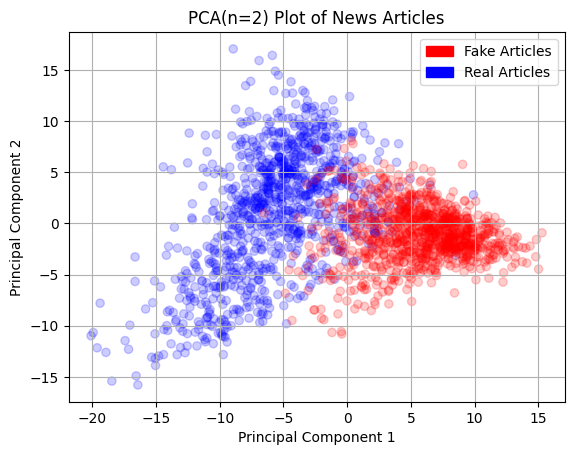

In [13]:
plt.scatter(df_pca2['PC1'], df_pca2['PC2'], c=sample_df['label_binary'].map({1 : 'red', 0: 'blue'}), alpha=.2)
plt.title('PCA(n=2) Plot of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)

# Create legend handles manually
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Fake Articles')
blue_patch = mpatches.Patch(color='blue', label='Real Articles')
plt.legend(handles=[red_patch, blue_patch])


plt.show()

In [11]:
pca3 = PCA(n_components=3)
pca3_scaled =  pca3.fit_transform(scaled_mean_vectors)

df_pca3 = pd.DataFrame(data = pca3_scaled, columns=[f'PC{i}' for i in range(1, 3 + 1)])
df_pca3

,PC1,PC2,PC3
0,-3.302900,2.794247,0.202129
1,-3.839859,3.460043,-8.967184
2,4.103438,3.556782,3.220942
3,-6.996925,-1.874744,4.011750
4,1.009635,0.618649,5.743889
...,...,...,...
1995,11.085293,-0.952207,-2.332481
1996,-2.013119,-9.261826,0.498474
1997,5.851372,-1.791644,-0.715527
1998,5.723330,4.058724,-3.918995


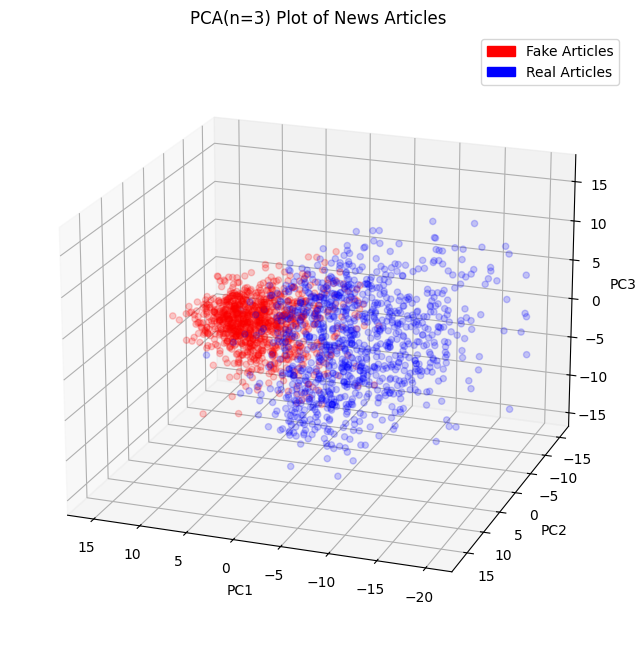

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca3['PC1'], df_pca3['PC2'], df_pca3['PC3'], c=sample_df['label_binary'].map({1: 'red', 0: 'blue'}), alpha=.2)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA(n=3) Plot of News Articles')

ax.view_init(azim=110, elev=20)
red_patch = mpatches.Patch(color='red', label='Fake Articles')
blue_patch = mpatches.Patch(color='blue', label='Real Articles')
ax.legend(handles=[red_patch, blue_patch])

plt.show()